In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
import pandasql as ps
import wordcloud
from wordcloud import WordCloud, STOPWORDS

In [4]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

In [5]:
df_fake.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [6]:
df_true.head(5)

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

In [7]:
df_fake["class"] = 0
df_true["class"] = 1

In [8]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [9]:
# Removing last 10 rows for manual testing
df_fake_manual_testing = df_fake.tail(10).copy()
for i in range(23480,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)
    
    
df_true_manual_testing = df_true.tail(10).copy()
for i in range(21416,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [10]:
df_fake.shape, df_true.shape

((23471, 5), (21407, 5))

In [11]:
df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1

In [12]:
df_fake_manual_testing.head(10)

title  \
23471  Seven Iranians freed in the prisoner swap have...   
23472                      #Hashtag Hell & The Fake Left   
23473  Astroturfing: Journalist Reveals Brainwashing ...   
23474          The New American Century: An Era of Fraud   
23475  Hillary Clinton: ‘Israel First’ (and no peace ...   
23476  McPain: John McCain Furious That Iran Treated ...   
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
23479  How to Blow $700 Million: Al Jazeera America F...   
23480  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text      subject  \
23471  21st Century Wire says This week, the historic...  Middle-east   
23472   By Dady Chery and Gilbert MercierAll writers ...  Middle-east   
23473  Vic Bishop Waking TimesOur reality is carefull...  Middle-east   
23474  Paul Craig RobertsIn the last years of the 20t...  Middle-east   
23475  Robert Fantina CounterpunchAlthough the United...  Middle-east   
23476  21st Century Wire says As 21WIRE reported earl...  Middle-east   
23477  21st Century Wire says It s a familiar theme. ...  Middle-east   
23478  Patrick Henningsen  21st Century WireRemember ...  Middle-east   
23479  21st Century Wire says Al Jazeera America will...  Middle-east   
23480  21st Century Wire says As 21WIRE predicted in ...  Middle-east   

                   date  class  
23471  January 20, 2016      0  
23472  January 19, 2016      0  
23473  January 19, 2016      0  
23474  January 19, 2016      0  
23475  January 18, 2016      0  
23476  January 16, 2016      0  
23477  January 16, 2016      0  
23478  January 15, 2016      0  
23479  January 14, 2016      0  
23480  January 12, 2016      0

In [13]:
df_true_manual_testing.head(10)

title  \
21407  Mata Pires, owner of embattled Brazil builder ...   
21408  U.S., North Korea clash at U.N. forum over nuc...   
21409  U.S., North Korea clash at U.N. arms forum on ...   
21410  Headless torso could belong to submarine journ...   
21411  North Korea shipments to Syria chemical arms a...   
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text    subject  \
21407  SAO PAULO (Reuters) - Cesar Mata Pires, the ow...  worldnews   
21408  GENEVA (Reuters) - North Korea and the United ...  worldnews   
21409  GENEVA (Reuters) - North Korea and the United ...  worldnews   
21410  COPENHAGEN (Reuters) - Danish police said on T...  worldnews   
21411  UNITED NATIONS (Reuters) - Two North Korean sh...  worldnews   
21412  BRUSSELS (Reuters) - NATO allies on Tuesday we...  worldnews   
21413  LONDON (Reuters) - LexisNexis, a provider of l...  worldnews   
21414  MINSK (Reuters) - In the shadow of disused Sov...  worldnews   
21415  MOSCOW (Reuters) - Vatican Secretary of State ...  worldnews   
21416  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...  worldnews   

                   date  class  
21407  August 22, 2017       1  
21408  August 22, 2017       1  
21409  August 22, 2017       1  
21410  August 22, 2017       1  
21411  August 21, 2017       1  
21412  August 22, 2017       1  
21413  August 22, 2017       1  
21414  August 22, 2017       1  
21415  August 22, 2017       1  
21416  August 22, 2017       1

In [14]:
def text_process(text):
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    
    return " ".join(text)

def stemmer(text):
    text = text.split()
    words = ""
    for i in text:
            stemmer = SnowballStemmer("english")
            words += (stemmer.stem(i))+" "
    return words


(-0.5, 1599.5, 799.5, -0.5)

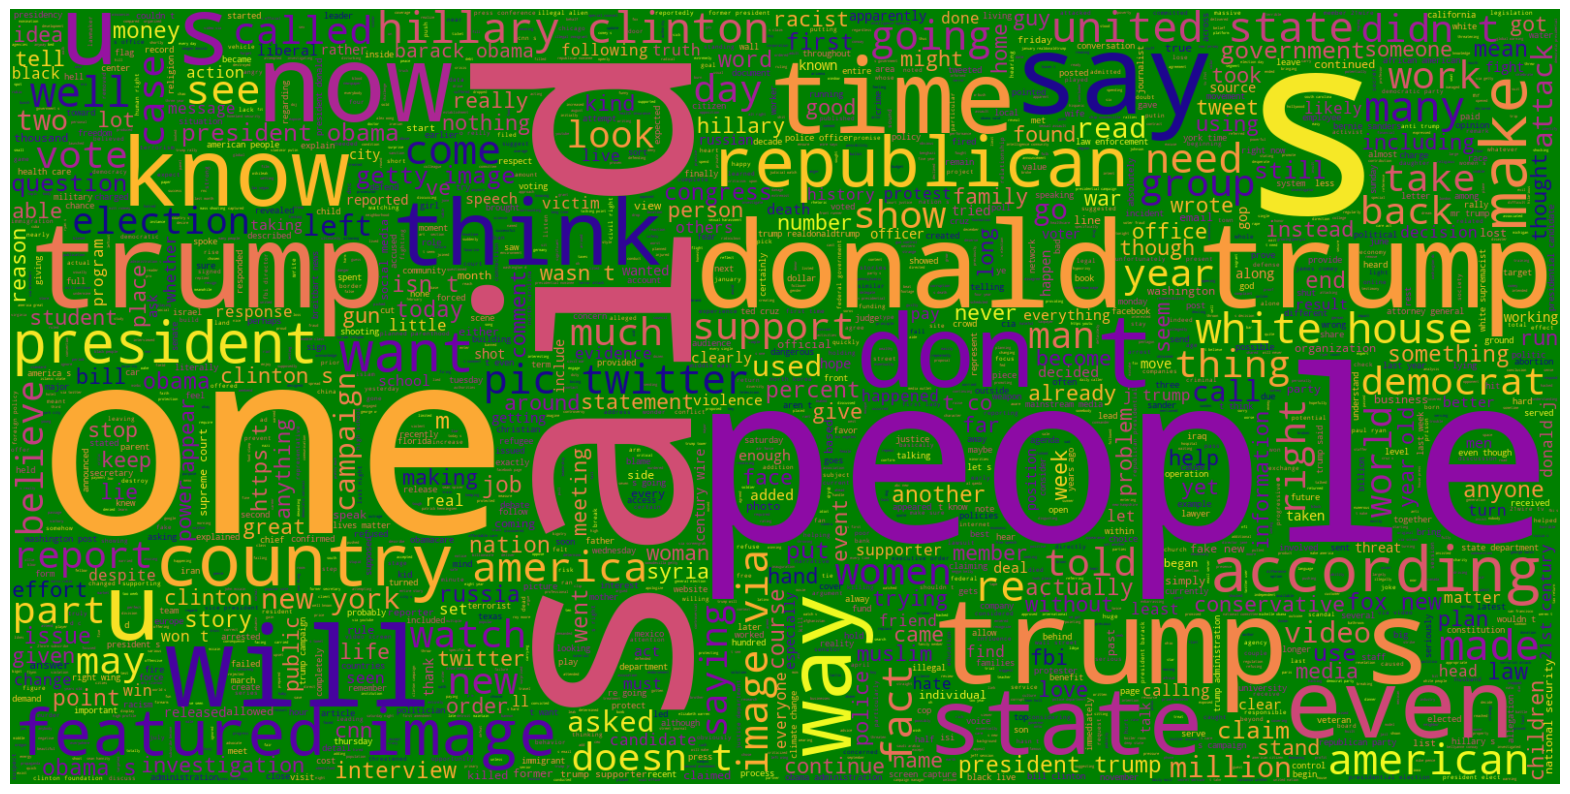

In [15]:
# visual the repeated words in df_fake.text series with use the WordCloud library with internal STOPWORDS in that
word_string=" ".join(df_fake.text.str.lower())
plt.figure(figsize=(20,14))
wc = WordCloud(background_color="green", stopwords = STOPWORDS, max_words=2000, max_font_size= 300,  width=1600, height=800)
wc.generate(word_string)
plt.imshow(wc.recolor( colormap= 'plasma' , random_state=17), interpolation="bilinear")
plt.axis('off')

In [16]:
df_fake1 = df_fake['title'].apply(text_process)
df_fake1 = df_fake1.apply(stemmer)

(-0.5, 1599.5, 799.5, -0.5)

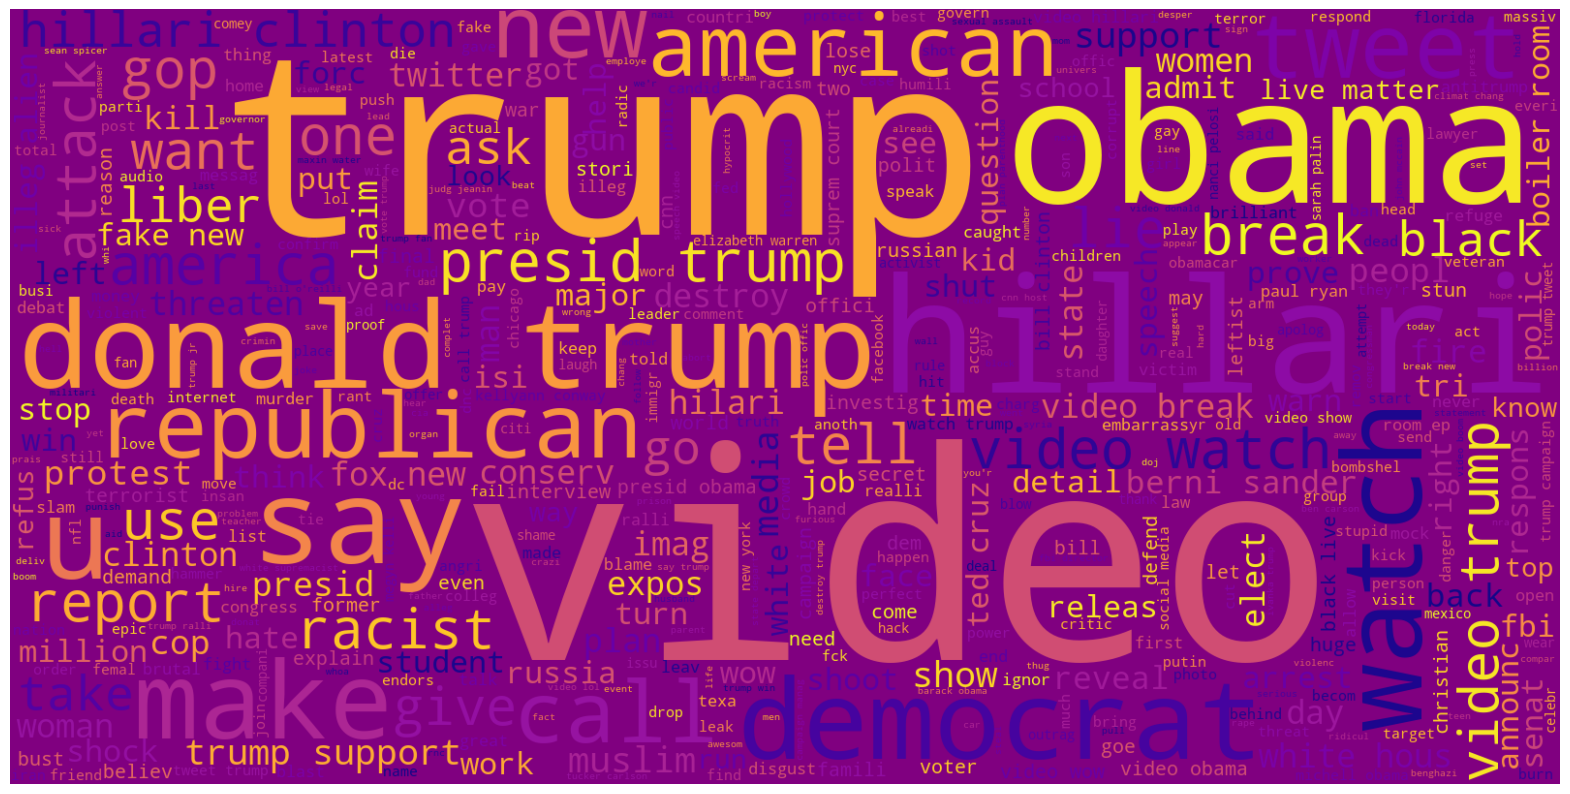

In [17]:
# visual the repeated words in df_fake.title series with use the WordCloud library and use STOPWORDS and STEMMER from nltk library
word_string=" ".join(df_fake1.str.lower())
plt.figure(figsize=(20,14))
wc = WordCloud(background_color="purple", max_words=500, max_font_size= 300,  width=1600, height=800)
wc.generate(word_string)
plt.imshow(wc.recolor( colormap= 'plasma' , random_state=17), interpolation="bilinear")
plt.axis('off')

(-0.5, 1599.5, 799.5, -0.5)

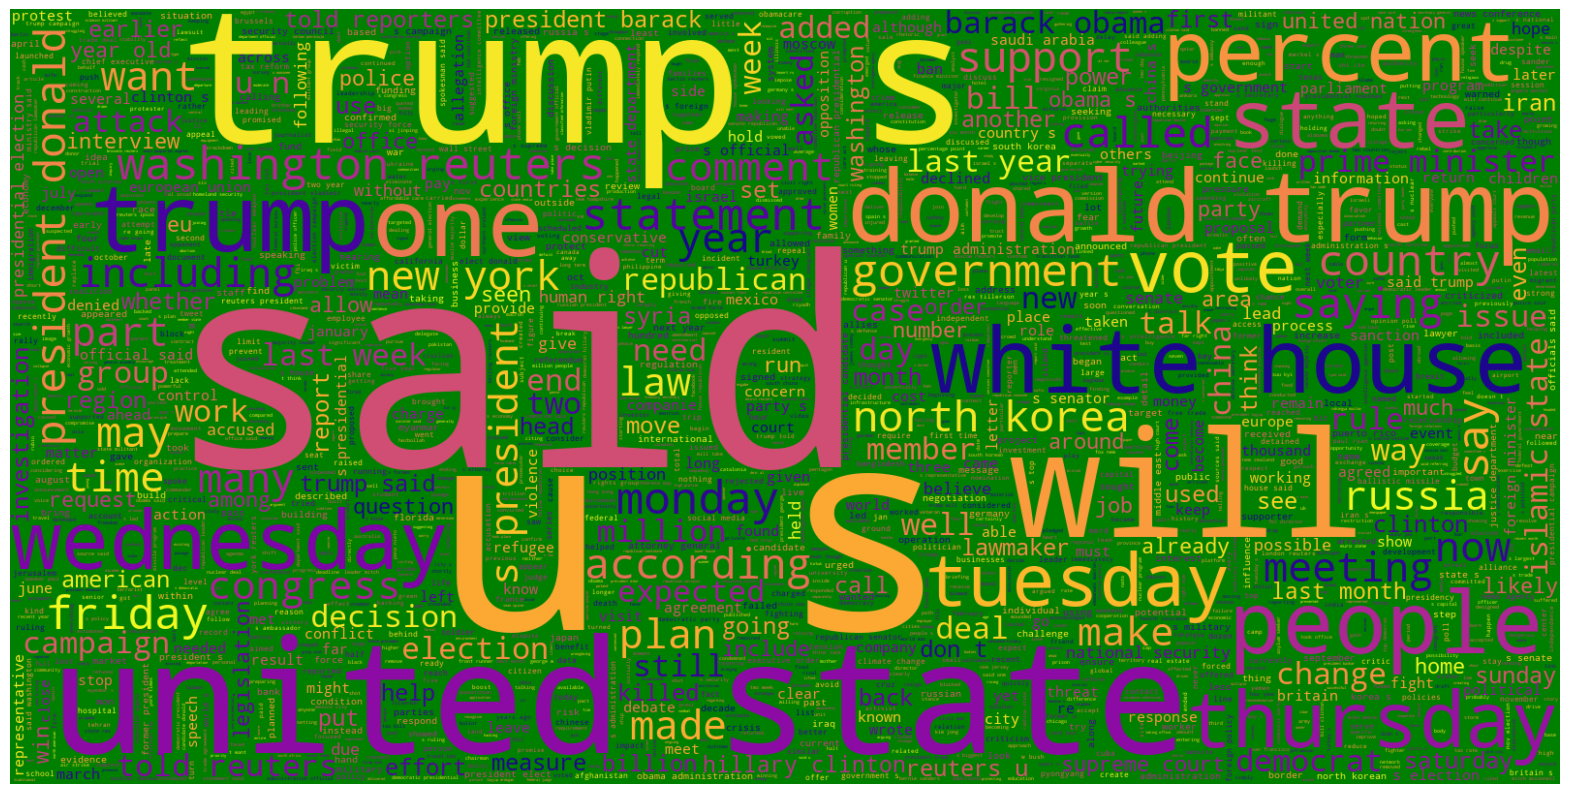

In [18]:
word_string=" ".join(df_true.text.str.lower())
plt.figure(figsize=(20,14))
wc = WordCloud(background_color="green", stopwords = STOPWORDS, max_words=2000, max_font_size= 300,  width=1600, height=800)
wc.generate(word_string)
plt.imshow(wc.recolor( colormap= 'plasma' , random_state=17), interpolation="bilinear")
plt.axis('off')

In [19]:
df_true1 = df_true['title'].apply(text_process)
df_true1 = df_true1.apply(stemmer)

(-0.5, 1599.5, 799.5, -0.5)

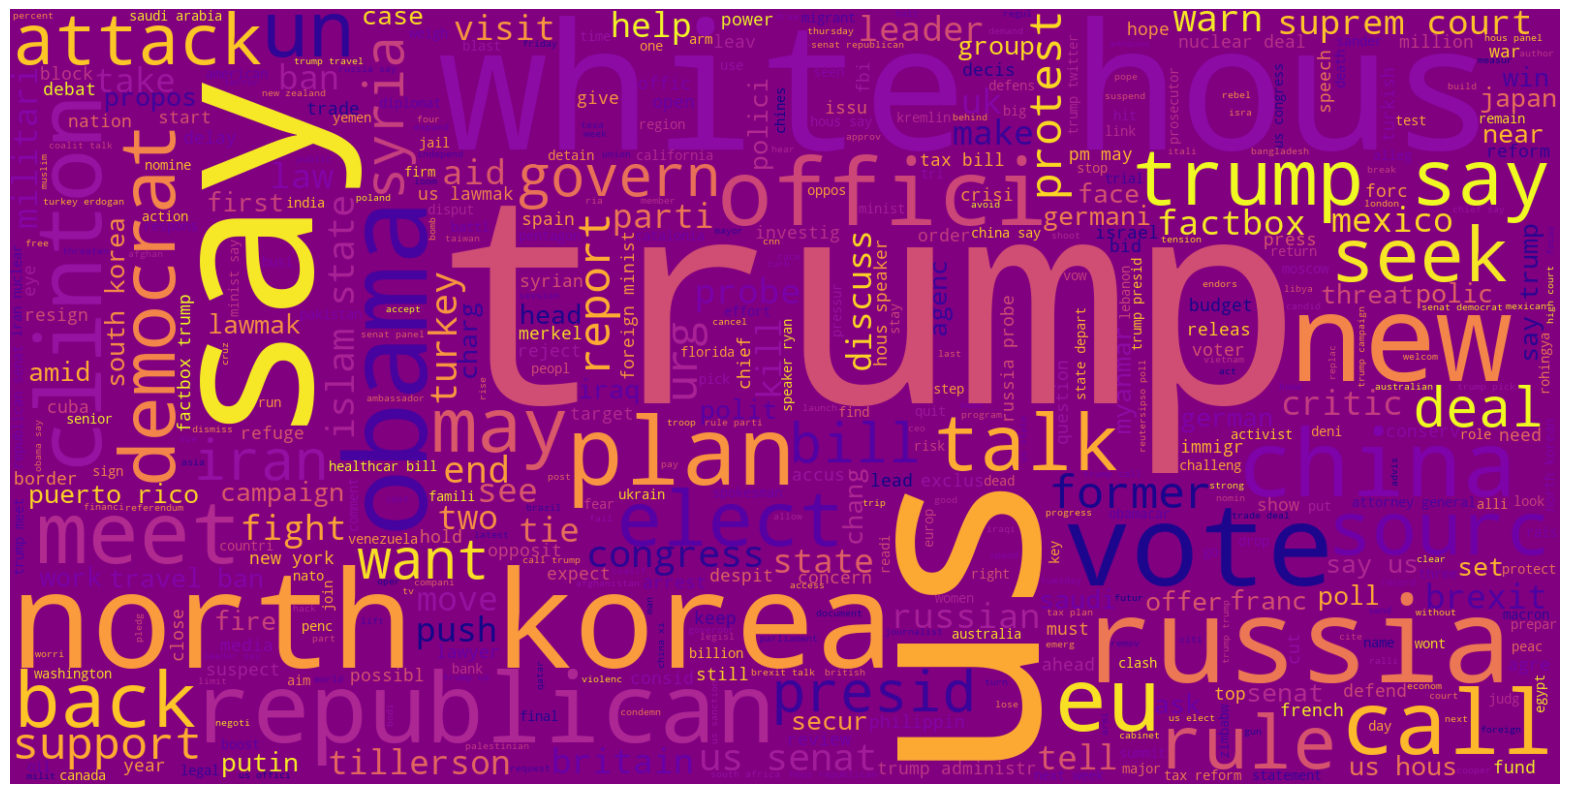

In [20]:
# visual the repeated words in df_true.title series with use the WordCloud library and use STOPWORDS and STEMMER from nltk library
word_string=" ".join(df_true1.str.lower())
plt.figure(figsize=(20,14))
wc = WordCloud(background_color="purple", max_words=500, max_font_size= 300,  width=1600, height=800)
wc.generate(word_string)
plt.imshow(wc.recolor( colormap= 'plasma' , random_state=17), interpolation="bilinear")
plt.axis('off')

Visualize base on subject feature in both datasets

Text(0.5, 1.0, 'Subject distribution in fake dataset')

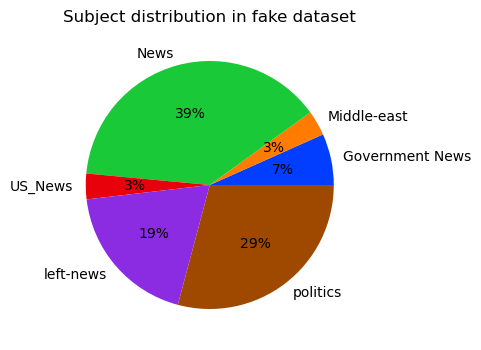

In [21]:
subject_ind = df_fake.groupby('subject')['subject'].count().index
subject_val = df_fake.groupby('subject')['subject'].count().values

palette_color = sns.color_palette('bright')
plt.figure(figsize=(4,6))
plt.pie(subject_val,labels=subject_ind,
        colors=palette_color, autopct='%.0f%%')
plt.title('Subject distribution in fake dataset')

Text(0.5, 1.0, 'Subject distribution in true dataset')

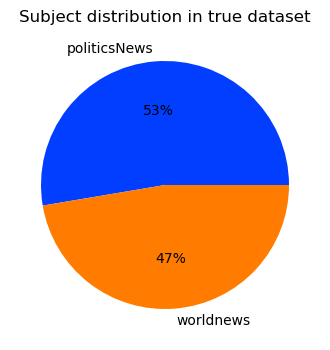

In [22]:
subject_ind = df_true.groupby('subject')['subject'].count().index
subject_val = df_true.groupby('subject')['subject'].count().values

palette_color = sns.color_palette('bright')
plt.figure(figsize=(4,6))
plt.pie(subject_val,labels=subject_ind,
        colors=palette_color, autopct='%.0f%%')
plt.title('Subject distribution in true dataset')

The separation of values in the 'subject' feature shows complete different values for true dataset and fake dataset, so it isn't useful feature for investigation more and use for prediction part

In [23]:
df_fake['text_length'] = df_true['text'].apply(len)
df_true['text_length'] = df_true['text'].apply(len)

array([[<AxesSubplot:title={'center':'Government News'}>,
        <AxesSubplot:title={'center':'Middle-east'}>],
       [<AxesSubplot:title={'center':'News'}>,
        <AxesSubplot:title={'center':'US_News'}>],
       [<AxesSubplot:title={'center':'left-news'}>,
        <AxesSubplot:title={'center':'politics'}>]], dtype=object)

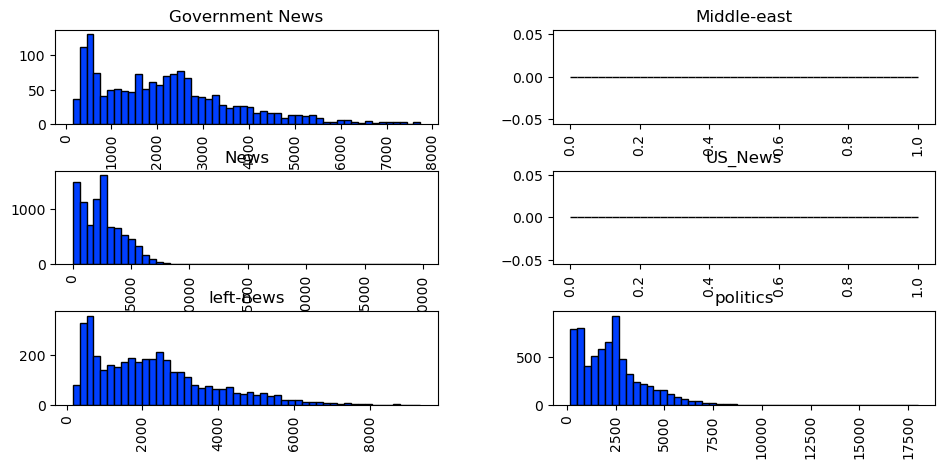

In [24]:
mpl.rcParams['patch.force_edgecolor'] = True
plt.style.use('seaborn-bright')
df_fake.hist(column='text_length', by='subject', bins=50,figsize=(11,5))

array([<AxesSubplot:title={'center':'politicsNews'}>,
       <AxesSubplot:title={'center':'worldnews'}>], dtype=object)

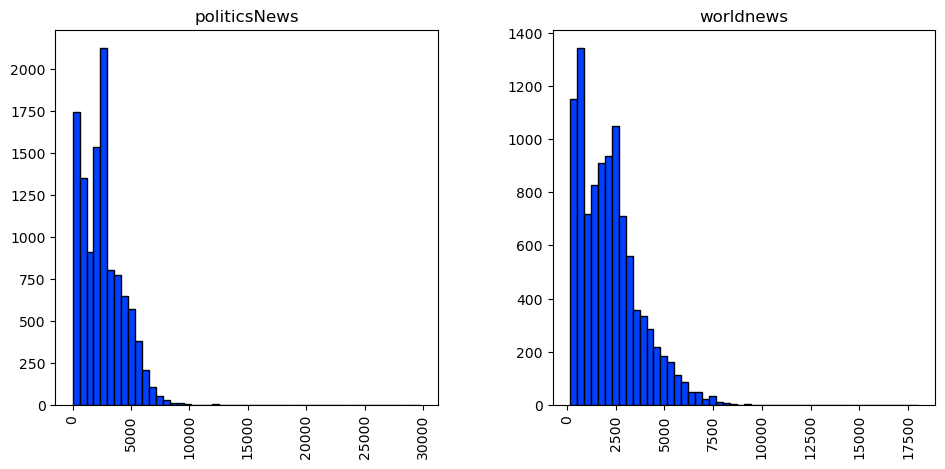

In [25]:
mpl.rcParams['patch.force_edgecolor'] = True
plt.style.use('seaborn-bright')
df_true.hist(column='text_length', by='subject', bins=50,figsize=(11,5))

The lenght of text help us to identify input lenght when using Neural Networks (RNN)
the optimal lenght that contain the most information is '5000'

In [26]:
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("manual_testing.csv")

In [27]:
df_merge = pd.concat([df_fake, df_true], axis =0 )
df_merge.head(10)

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   
5   Racist Alabama Cops Brutalize Black Boy While...   
6   Fresh Off The Golf Course, Trump Lashes Out A...   
7   Trump Said Some INSANELY Racist Stuff Inside ...   
8   Former CIA Director Slams Trump Over UN Bully...   
9   WATCH: Brand-New Pro-Trump Ad Features So Muc...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   
5  The number of cases of cops brutalizing and ki...    News   
6  Donald Trump spent a good portion of his day a...    News   
7  In the wake of yet another court decision that...    News   
8  Many people have raised the alarm regarding th...    News   
9  Just when you might have thought we d get a br...    News   

                date  class  text_length  
0  December 31, 2017      0       4659.0  
1  December 31, 2017      0       4077.0  
2  December 30, 2017      0       2789.0  
3  December 29, 2017      0       2461.0  
4  December 25, 2017      0       5204.0  
5  December 25, 2017      0       3707.0  
6  December 23, 2017      0       3220.0  
7  December 23, 2017      0        856.0  
8  December 22, 2017      0        632.0  
9  December 21, 2017      0        408.0

In [28]:
df_merge.columns

Index(['title', 'text', 'subject', 'date', 'class', 'text_length'], dtype='object')

#### Use the traditional Machine Learning

In [29]:
df = df_merge.drop(["title", "subject","date", 'text_length'], axis = 1)

In [30]:
df.isnull().sum()

text     0
class    0
dtype: int64

In [31]:
df = df.sample(frac = 1)

In [32]:
df.head()

text  class
13332  WASHINGTON (Reuters) - The United States remai...      1
16071  FOX News is announcing that President Trump be...      0
13618  MEXICO CITY (Reuters) - A newly unveiled presi...      1
2487   Alleged president Donald Trump is plagued with...      0
11281  WELLINGTON (Reuters) - Israel s ambassador to ...      1

In [33]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [34]:
df.columns

Index(['text', 'class'], dtype='object')

In [35]:
df.head()

text  class
0  WASHINGTON (Reuters) - The United States remai...      1
1  FOX News is announcing that President Trump be...      0
2  MEXICO CITY (Reuters) - A newly unveiled presi...      1
3  Alleged president Donald Trump is plagued with...      0
4  WELLINGTON (Reuters) - Israel s ambassador to ...      1

In [36]:
# create a manual function to clean the text
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [37]:
df["text"] = df["text"].apply(wordopt)

In [38]:
x = df["text"]
y = df["class"]

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [40]:
# change the character to representive vector number
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [41]:
LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [42]:
pred_lr=LR.predict(xv_test)

In [43]:
LR.score(xv_test, y_test)

0.9859180035650624

In [44]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5894
           1       0.98      0.99      0.99      5326

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [45]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [46]:
pred_dt = DT.predict(xv_test)

In [47]:
DT.score(xv_test, y_test)

0.9954545454545455

In [48]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5894
           1       0.99      1.00      1.00      5326

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [49]:
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [50]:
pred_gbc = GBC.predict(xv_test)

In [51]:
GBC.score(xv_test, y_test)

0.9950089126559715

In [52]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5894
           1       0.99      1.00      0.99      5326

    accuracy                           1.00     11220
   macro avg       0.99      1.00      0.99     11220
weighted avg       1.00      1.00      1.00     11220



In [53]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [54]:
pred_rfc = RFC.predict(xv_test)

In [55]:
RFC.score(xv_test, y_test)

0.9896613190730837

In [56]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5894
           1       0.99      0.99      0.99      5326

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



#### RNN

Neural network give us opportunity to learn Machine with more input features, for example in this case I can run one network with using two inputs from title and text separately but learn in one network

In [57]:
df_merge.head(10)

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   
5   Racist Alabama Cops Brutalize Black Boy While...   
6   Fresh Off The Golf Course, Trump Lashes Out A...   
7   Trump Said Some INSANELY Racist Stuff Inside ...   
8   Former CIA Director Slams Trump Over UN Bully...   
9   WATCH: Brand-New Pro-Trump Ad Features So Muc...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   
5  The number of cases of cops brutalizing and ki...    News   
6  Donald Trump spent a good portion of his day a...    News   
7  In the wake of yet another court decision that...    News   
8  Many people have raised the alarm regarding th...    News   
9  Just when you might have thought we d get a br...    News   

                date  class  text_length  
0  December 31, 2017      0       4659.0  
1  December 31, 2017      0       4077.0  
2  December 30, 2017      0       2789.0  
3  December 29, 2017      0       2461.0  
4  December 25, 2017      0       5204.0  
5  December 25, 2017      0       3707.0  
6  December 23, 2017      0       3220.0  
7  December 23, 2017      0        856.0  
8  December 22, 2017      0        632.0  
9  December 21, 2017      0        408.0

In [58]:
df_merge['title_length'] = df_merge.title.apply(len)

In [59]:
optimal_length_text = int(np.quantile(df_merge.text_length.fillna(0),.95))
optimal_length_title = int(np.quantile(df_merge.title_length.fillna(0),.95))

In [74]:
df_text = df_merge.text
df_text.apply(wordopt)
print('text_process finished')
df_text.apply(stemmer)
df_text_length = df_text.apply(len)
optimal_length_text = int(np.quantile(df_text_length.fillna(0),.95))
df_text_r = df_text.apply(lambda x: x[:optimal_length_text])

text_process finished


KeyboardInterrupt: 

In [80]:
df_title = df_merge.title
df_title.apply(text_process)
print('text_process finished')
df_title.apply(stemmer)
df_title_length = df_title.apply(len)
optimal_length_title = int(np.quantile(df_title_length.fillna(0),.95))
df_title_r = df_title.apply(lambda x: x[:optimal_length_title])

text_process finished


In [81]:
y = df_merge["class"]

In [82]:
x_train_text, x_test_text, y_train, y_test = train_test_split(df_text_r, y, test_size=0.25)
x_train_title, x_test_title, _, _ = train_test_split(df_title_r, y, test_size=0.25)

In [83]:
vectorization = TfidfVectorizer()
xv_train_text = vectorization.fit_transform(x_train_text)
xv_test_text = vectorization.transform(x_test_text)
xv_train_title = vectorization.fit_transform(x_train_title)
xv_test_title = vectorization.transform(x_test_title)

In [158]:
xv_train_text.shape

(33658, 105561)

In [161]:
xv_train_text.reshape(33658,105561,)

<33658x105561 sparse matrix of type '<class 'numpy.float64'>'
	with 6805491 stored elements in Compressed Sparse Row format>

In [125]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Input, Embedding, RNN
import tensorflow as tf
from tensorflow import keras

In [166]:
num_outputs = 32
tf.random.set_seed(1)
text_NN = Sequential([ 
  
  Embedding(xv_train_text.shape[1],1),
  LSTM(64),
  Dense(128, activation='relu'),
  Dense(128, activation='relu'),
  Dense(num_outputs),

])

title_NN = Sequential([
  
  Embedding(xv_train_title.shape[1],1),
  LSTM(64),
  Dense(128, activation='relu'),
  Dense(128, activation='relu'),
  Dense(num_outputs),

])

In [167]:
text_shape = xv_train_text.shape
title_shape = xv_train_title.shape

In [168]:
input_text = tf.keras.layers.Input(shape=(text_shape))
vtext = text_NN(input_text)

input_title = tf.keras.layers.Input(shape=(title_shape))
vtitle = title_NN(input_title)

output = tf.keras.layers.Dot(axes=1)([vtext, vtitle])

model = tf.keras.Model([input_text, input_title], output)

model.summary()

ValueError: Exception encountered when calling layer "sequential_7" (type Sequential).

Input 0 of layer "lstm_5" is incompatible with the layer: expected ndim=3, found ndim=4. Full shape received: (None, 33658, 105561, 1)

Call arguments received by layer "sequential_7" (type Sequential):
  • inputs=tf.Tensor(shape=(None, 33658, 105561), dtype=float32)
  • training=None
  • mask=None

In [119]:
tf.random.set_seed(1)
cost_fn = tf.keras.losses.MeanSquaredError()
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,
              loss=cost_fn)

In [105]:
tf.random.set_seed(1)
model.fit([xv_train_text, xv_train_title], y_train, epochs=5)

Epoch 1/5


ValueError: in user code:

    File "C:\Users\Mehrad Tavanamehr\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Mehrad Tavanamehr\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Mehrad Tavanamehr\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Mehrad Tavanamehr\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\Mehrad Tavanamehr\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Mehrad Tavanamehr\AppData\Roaming\Python\Python39\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model" is incompatible with the layer: expected shape=(None, 33658, 105561), found shape=(None, 105561)


In [169]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]),                                                                                                       output_lable(pred_DT[0]), 
                                                                                                              output_lable(pred_GBC[0]), 
                                                                                                              output_lable(pred_RFC[0])))

In [44]:
news = str(input())
manual_testing(news)

BRUSSELS (Reuters) - NATO allies on Tuesday welcomed President Donald Trump s decision to commit more forces to Afghanistan, as part of a new U.S. strategy he said would require more troops and funding from America s partners. Having run for the White House last year on a pledge to withdraw swiftly from Afghanistan, Trump reversed course on Monday and promised a stepped-up military campaign against  Taliban insurgents, saying:  Our troops will fight to win .  U.S. officials said he had signed off on plans to send about 4,000 more U.S. troops to add to the roughly 8,400 now deployed in Afghanistan. But his speech did not define benchmarks for successfully ending the war that began with the U.S.-led invasion of Afghanistan in 2001, and which he acknowledged had required an   extraordinary sacrifice of blood and treasure .  We will ask our NATO allies and global partners to support our new strategy, with additional troops and funding increases in line with our own. We are confident they w

In [45]:
news = str(input())
manual_testing(news)

Vic Bishop Waking TimesOur reality is carefully constructed by powerful corporate, political and special interest sources in order to covertly sway public opinion. Blatant lies are often televised regarding terrorism, food, war, health, etc. They are fashioned to sway public opinion and condition viewers to accept what have become destructive societal norms.The practice of manipulating and controlling public opinion with distorted media messages has become so common that there is a whole industry formed around this. The entire role of this brainwashing industry is to figure out how to spin information to journalists, similar to the lobbying of government. It is never really clear just how much truth the journalists receive because the news industry has become complacent. The messages that it presents are shaped by corporate powers who often spend millions on advertising with the six conglomerates that own 90% of the media:General Electric (GE), News-Corp, Disney, Viacom, Time Warner, a

In [46]:
news = str(input())
manual_testing(news)

SAO PAULO (Reuters) - Cesar Mata Pires, the owner and co-founder of Brazilian engineering conglomerate OAS SA, one of the largest companies involved in Brazil s corruption scandal, died on Tuesday. He was 68. Mata Pires died of a heart attack while taking a morning walk in an upscale district of S o Paulo, where OAS is based, a person with direct knowledge of the matter said. Efforts to contact his family were unsuccessful. OAS declined to comment. The son of a wealthy cattle rancher in the northeastern state of Bahia, Mata Pires  links to politicians were central to the expansion of OAS, which became Brazil s No. 4 builder earlier this decade, people familiar with his career told Reuters last year. His big break came when he befriended Antonio Carlos Magalh es, a popular politician who was Bahia governor several times, and eventually married his daughter Tereza. Brazilians joked that OAS stood for  Obras Arranjadas pelo Sogro  - or  Work Arranged by the Father-In-Law.   After years of